In [157]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 


# Uppgift 0 - uppvärmning med riket
### I den här uppgiften ska du visualisera med hjälp av matplotlib och/eller seaborn
- a) Börja med att läsa in filen riket2023_åk9_np.xlsx och sheets för de olika ämnena. Ändra kolumnnamnen på
respektive dataframe så du får något liknande som nedan

In [158]:
df_subjects = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= [0,1,2,3])

df_svenska_andraspråk = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 3) # Imports the math sheet excel file  and skips 8 rows


df_svenska = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 2) # Imports the math sheet excel file  and skips 8 rows


df_engelska = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 0) # Imports the math sheet excel file  and skips 8 rows


df_matematik = pd.read_excel("../data/labb_2/riket2023_åk9_np.xlsx", skiprows=8, sheet_name= 1) # Imports the math sheet excel file  and skips 8 rows
df_matematik

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [159]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Riket            4 non-null      object 
 1   Typ av huvudman  4 non-null      object 
 2   Totalt           4 non-null      int64  
 3   Flickor          4 non-null      int64  
 4   Pojkar           4 non-null      int64  
 5   Totalt           4 non-null      object 
 6   Flickor          4 non-null      object 
 7   Pojkar           4 non-null      object 
 8   Totalt           4 non-null      float64
 9   Flickor          4 non-null      float64
 10  Pojkar           4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


In [160]:
df_matematik.columns = [1,2,3,4,5,6,7,8,9,10,11]  # Ändrar kolumnerna till siffror pga multiple titles
df_matematik.head()

,1,2,3,4,5,6,7,8,9,10,11
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [161]:
df_matematik.columns = ["Riket", "Huvudman", "Totalt (A-F)", "Flickor (A-F)", "Pojkar (A-F)", "Totalt (A-E)", "Flickor (A-E)", "Pojkar (A-E)", "Totalt (Poäng)", "Flickor (Poäng)", "Pojkar (Poäng)"]
df_matematik

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [162]:
df_matematik.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Riket            4 non-null      object 
 1   Huvudman         4 non-null      object 
 2   Totalt (A-F)     4 non-null      int64  
 3   Flickor (A-F)    4 non-null      int64  
 4   Pojkar (A-F)     4 non-null      int64  
 5   Totalt (A-E)     4 non-null      object 
 6   Flickor (A-E)    4 non-null      object 
 7   Pojkar (A-E)     4 non-null      object 
 8   Totalt (Poäng)   4 non-null      float64
 9   Flickor (Poäng)  4 non-null      float64
 10  Pojkar (Poäng)   4 non-null      float64
dtypes: float64(3), int64(3), object(5)
memory usage: 484.0+ bytes


### b) Ta reda på antalet som fått F i matematik totalt, pojkar respektive flickor.

In [163]:
total_number_girls = 51548 
total_number_boys = 55218


percentage_f_grade = 11.3/100
boys_percentage_f_grade = 11.5/100  # gör om till decimal

girls_with_f_grade = round(total_number_girls*percentage_f_grade) #beräknar mängden tjejer som fick f
boys_with_f_grade = round(total_number_boys*boys_percentage_f_grade) #beräknar mängden killar som fick f

print("Total numbers of boys who recieved an F in mathematics at year 9 is:", girls_with_f_grade)
print("Total numbers of boys who recieved an F in mathematics at year 9 is:", boys_with_f_grade)

Total numbers of boys who recieved an F in mathematics at year 9 is: 5825
Total numbers of boys who recieved an F in mathematics at year 9 is: 6350


### c) Rita ett stapeldiagram på totala poängen för de olika ämnena

In [164]:
df_subjects[3] = df_subjects[3].drop(labels=3)
df_subjects[3]

,Riket,Typ av huvudman,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar,Totalt,Flickor,Pojkar
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4


In [165]:

for key in df_subjects:
    df_subjects[key].columns = [
         "Riket",
         "Huvudman",
         "Totalt (A-F)",
         "Flickor (A-F)",
         "Pojkar (A-F)",
         "Totalt (A-E)",
         "Flickor (A-E)",
         "Pojkar (A-E)",
         "Totalt (Poäng)",
         "Flickor (Poäng)",
         "Pojkar (Poäng)",
    ]
   

df_subjects[1].head()




,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,106766,51548,55218,89.1,88.7,89.5,11.9,11.8,12.0
1,Riket,Kommunal,84163,40386,43777,88.1,87.7,88.5,11.6,11.5,11.7
2,Riket,Enskild,22553,11137,11416,92.9,92.2,93.5,13.0,12.8,13.1
3,Riket,Skolverket,50,25,25,~100,~100,~100,14.1,13.5,14.7


In [166]:
df_subjects[1]["Totalt (Poäng)"][0] # samtliga. gör detta för alla. lägg i lista.. plota listan 

11.9

In [167]:
df_subjects

{0:    Riket    Huvudman  Totalt (A-F)  Flickor (A-F)  Pojkar (A-F)  Totalt (A-E)  \
 0  Riket    Samtliga        106941          51864         55077          97.0   
 1  Riket    Kommunal         84310          40675         43635          96.6   
 2  Riket     Enskild         22582          11165         11417          98.7   
 3  Riket  Skolverket            49             24            25         100.0   
 
    Flickor (A-E)  Pojkar (A-E)  Totalt (Poäng)  Flickor (Poäng)  \
 0           97.1          97.0            15.7             15.8   
 1           96.6          96.6            15.4             15.5   
 2           98.8          98.7            16.9             17.0   
 3          100.0         100.0            18.5             18.9   
 
    Pojkar (Poäng)  
 0            15.7  
 1            15.4  
 2            16.8  
 3            18.2  ,
 1:    Riket    Huvudman  Totalt (A-F)  Flickor (A-F)  Pojkar (A-F) Totalt (A-E)  \
 0  Riket    Samtliga        106766          51548   

In [168]:
key

3

In [169]:
for key in df_subjects:
    print(df_subjects[key]["Totalt (Poäng)"][0]) 


15.7
11.9
13.6
9.4


In [170]:
total_point= [df_subjects[key]["Totalt (Poäng)"][0] for key in df_subjects] #list comprehenssion
total_point

[15.7, 11.9, 13.6, 9.4]

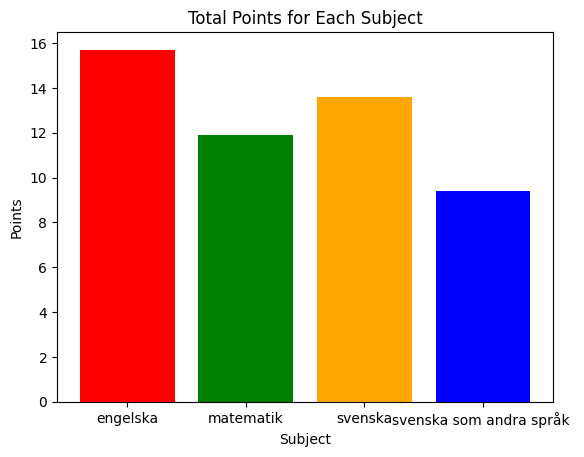

In [171]:
colors = ["red", "green", "orange", "blue"] # sätterfärger på pelarna
subject_names = ["engelska", "matematik", "svenska", "svenska som andra språk "] #försök till att sätta rätt ämne till pelaren 
# pd.Series(total_point).plot(kind="bar", x="", y="", xlabel= "subject", ylabel="Points", color=colors)
plt.bar(subject_names, total_point, color=colors,)
plt.xlabel("Subject")
plt.ylabel("Points")
plt.title("Total Points for Each Subject")
plt.show()

In [172]:
df_subjects[2]

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,93225,45800,47425,96.1,97.9,94.4,13.6,14.5,12.7
1,Riket,Kommunal,72771,35484,37287,95.7,97.6,93.8,13.3,14.3,12.4
2,Riket,Enskild,20414,10297,10117,97.6,98.7,96.6,14.4,15.2,13.5
3,Riket,Skolverket,40,19,21,100.0,100.0,100.0,15.0,15.9,14.2


# Tar ut Df 1 by 1 total poäng för kolumnerna samtliga, kommunal, enskild & skolverket

# samtliga

In [173]:
total_poäng_samtliga = [

]
for i in range(4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Samtliga"]["Totalt (Poäng)"].values[0] # boolean mask 
    total_poäng_samtliga.append(total_point)
    print(total_poäng_samtliga)
    

[15.7]
[15.7, 11.9]
[15.7, 11.9, 13.6]
[15.7, 11.9, 13.6, 9.4]


# kommunal

In [174]:
total_poäng_kommunal = [
    
]

for i in range (4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"]== "Kommunal"]["Totalt (Poäng)"].values[0]
    total_poäng_kommunal.append(total_point)
    print(total_poäng_kommunal)

[15.4]
[15.4, 11.6]
[15.4, 11.6, 13.3]
[15.4, 11.6, 13.3, 9]


# enskild

In [175]:
total_poäng_enskild = [

]

for i in range (4):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Enskild"]["Totalt (Poäng)"].values[0]
    total_poäng_enskild.append(total_point)
    print(total_poäng_enskild)

[16.9]
[16.9, 13.0]
[16.9, 13.0, 14.4]
[16.9, 13.0, 14.4, 11.1]


# skolverket

In [176]:
total_poäng_skolverk = [

]

for i in range(3):
    total_point = df_subjects[i][df_subjects[i]["Huvudman"] == "Skolverket"]["Totalt (Poäng)"].values[0]
    total_poäng_skolverk.append(total_point)
    print(total_poäng_skolverk)

[18.5]
[18.5, 14.1]
[18.5, 14.1, 15.0]


In [177]:
df_subjects[3]

,Riket,Huvudman,Totalt (A-F),Flickor (A-F),Pojkar (A-F),Totalt (A-E),Flickor (A-E),Pojkar (A-E),Totalt (Poäng),Flickor (Poäng),Pojkar (Poäng)
0,Riket,Samtliga,14092,6447,7645,77.7,81.6,74.3,9.4,10.2,8.7
1,Riket,Kommunal,11963,5495,6468,75.9,80,72.4,9,9.9,8.3
2,Riket,Enskild,2122,949,1173,87.7,90.9,85.2,11.1,12,10.4


In [178]:
total_poäng_skolverk

[18.5, 14.1, 15.0]

In [179]:
subject_names[:3]

['engelska', 'matematik', 'svenska']

d) Rita fyra olika stapeldiagram i subplots på totala poängen för de olika ämnena för de olika huvudmännen.

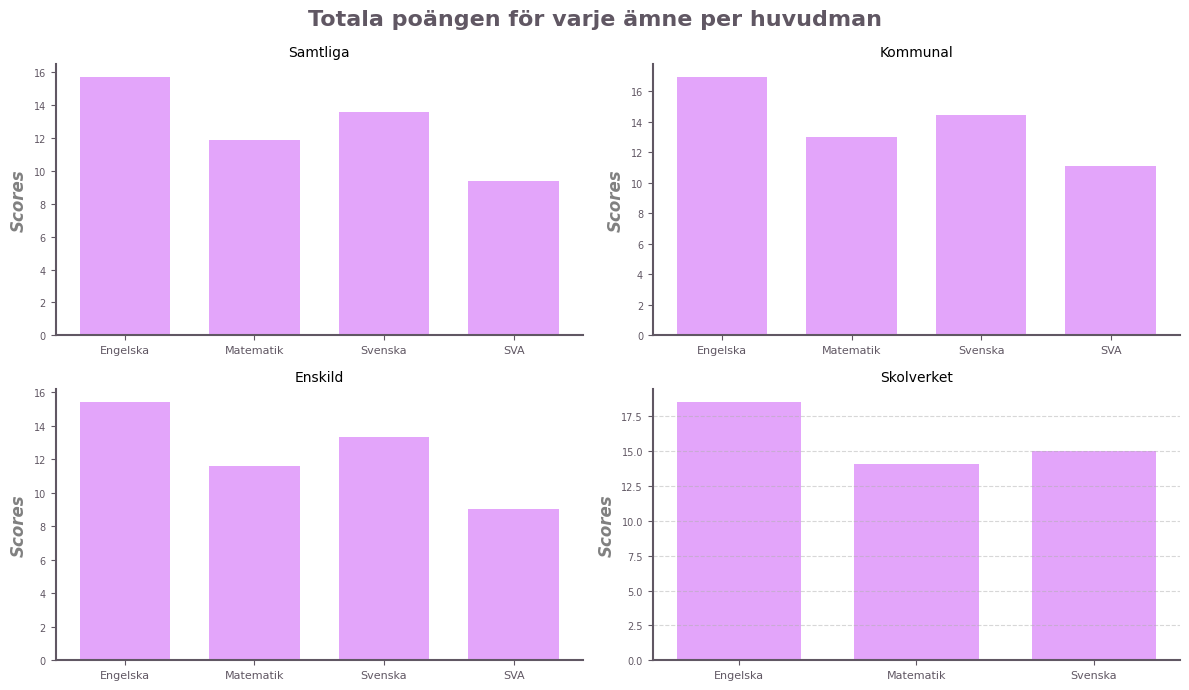

In [180]:
subject_names = ["Engelska", "Matematik", "Svenska", "SVA"]
huvudman_names = ["Samtliga", "Kommunal", "Enskild", "Skolverket"]

# sätter färg
colors = ["#e3a5fa", "#e3a5fa", "#e3a5fa", "#e3a5fa"]
GRAY = "#a291a8"
BETONG = "#605763"

total_poäng_huvudman =[total_poäng_samtliga, total_poäng_enskild, total_poäng_kommunal,total_poäng_skolverk ]

# Plot stacked bar charts for each huvudman in subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 7))
fig.suptitle("Totala poängen för varje ämne per huvudman", fontsize=16, fontweight='bold', color = BETONG)

total_poäng_huvudman = [
    total_poäng_samtliga,
    total_poäng_enskild,
    total_poäng_kommunal,
    total_poäng_skolverk,
]


for ax, poäng, huvudman_name in zip(
    axes.flatten(), total_poäng_huvudman, huvudman_names
):
    ax.bar(subject_names[: len(poäng)], poäng, color = colors, width= 0.7)
    ax.set_title(huvudman_name, fontsize=10)
    ax.set_ylabel('Scores', fontsize=12, fontstyle='italic', color='gray', fontweight = "bold")
    ax.tick_params(axis='x', labelsize=8, colors=BETONG)
    ax.tick_params(axis='y', labelsize=7, colors=BETONG)
    

    for spine in ['left', 'bottom']:
        ax.spines[spine].set_color(BETONG)
        ax.spines[spine].set_linewidth(1.5)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)

ax.grid(axis='y', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()
   

   # ax.spines["left"].set_color(BETONG)
   # ax.spines["bottom"].set_color(BETONG)
   # ax.spines["top"].set_visible(False)
   # ax.spines["right"].set_visible(False)
   # ax.grid(axis='y', linestyle='--', alpha=0.5)


In [181]:
##subject_names = ["Engelska", "Matematik", "Svenska", "SAS"]
##huvudman_names = ["Samtliga", "Kommunal", "Enskild", "Skolverket"]
##
### sätter färg
##colors = ['red', 'blue', 'green', 'orange']
##
### Plot stacked bar charts for each huvudman in subplots
##fig, axes = plt.subplots(nrows=2, ncols=2,  figsize=(12, 7))
##
### axes.set_xticklabels(axes.get_xticklabels(), rotation = 90)
##
##total_poäng_huvudman =[total_poäng_samtliga, total_poäng_enskild, total_poäng_kommunal,total_poäng_skolverk ]
##
##
##
###axes[0,0].bar(x = subject_names, height = total_poäng_samtliga )
###axes[0,1].bar(x = subject_names, height = total_poäng_kommunal)
###axes[1,0].bar(x = subject_names, height = total_poäng_enskild)
###axes[1,1].bar(x = subject_names[:3], height = total_poäng_skolverk)
##
##for ax_row, total_poäng_data, title in zip(axes, total_poäng_huvudman, huvudman_names):
 #   for ax, poäng in zip(ax_row, total_poäng_huvudman):
 #       
 #       if title == "skolverk":
 #           ax.bar(x=subject_names[:3], height=poäng, color = colors)
 #       else:
 #           ax.bar(x=subject_names, height=poäng, color = colors)
 #       ax.set_title(title)
 #       




#axes[0,0].set_title("samtliga",fontsize = 10)
#axes[0,1].set_title("Kommunal",fontsize = 10)
#axes[1,0].set_title("Enskild", fontsize = 10)
#axes[1,1].set_title("Skolverket", fontsize = 10)






# Add labels and title
#fig.suptitle("Totala poängen för varje ämne samt huvudman")
#plt.tight_layout()
#
## Show the plot
#plt.show()

# Uppgift 1 - uppvärmning betyg och prov
### 
I uppgifterna nedan ska du använda dig av datasetet betyg_o_prov_riksnivå.xlsx. Använd Plotly för att rita diagrammen
nedan för de uppgifter som kräver diagram. Använd Pandas för att svara på frågor om datasetet.
  
## a) Rita ett linjediagram för andel elever som saknar godkänt betyg i ett eller fler ämnen för läsår 18-23. Ta med totalt,
flickor och pojkar i samma graf.


In [182]:
import plotly.express as px
df_No_Grades = pd.read_excel("../data/labb_2/betyg_o_prov_riksnivå.xlsx",skiprows=7, sheet_name=1 ).iloc[0:5]
df_Grades = pd.read_excel("../data/labb_2/betyg_o_prov_riksnivå.xlsx", skiprows=9, sheet_name=0).iloc[0:5]

df_No_Grades


,Unnamed: 0,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1,Totalt.2,Flickor.2,Pojkar.2
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [183]:
df_Grades

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Totalt,Flickor,Pojkar,Totalt.1,Flickor.1,Pojkar.1
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955


In [184]:
df_No_Grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  5 non-null      object 
 1   Totalt      5 non-null      float64
 2   Flickor     5 non-null      float64
 3   Pojkar      5 non-null      float64
 4   Totalt.1    5 non-null      float64
 5   Flickor.1   5 non-null      float64
 6   Pojkar.1    5 non-null      float64
 7   Totalt.2    5 non-null      float64
 8   Flickor.2   5 non-null      float64
 9   Pojkar.2    5 non-null      float64
dtypes: float64(9), object(1)
memory usage: 532.0+ bytes


In [185]:
df_No_Grades.columns = [1,2,3,4,5,6,7,8,9,10]
df_No_Grades.head()

,1,2,3,4,5,6,7,8,9,10
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [186]:
df_Grades.columns = [1,2,3,4,5,6,7,8,9,10]
df_Grades.head()

,1,2,3,4,5,6,7,8,9,10
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955


In [187]:
df_No_Grades.columns = [
    "Läsår",
    "Totalt_Merit_16",
    "Flickor_Merit_16",
    "Pojkar_Merit_16",
    "Totalt_Merit_17",
    "Flickor_Merit_17",
    "Pojkar_Merit_17",
    "Totalt_%",
    "Flickor_%",
    "Pojkar_%",
]
df_No_Grades.head()

,Läsår,Totalt_Merit_16,Flickor_Merit_16,Pojkar_Merit_16,Totalt_Merit_17,Flickor_Merit_17,Pojkar_Merit_17,Totalt_%,Flickor_%,Pojkar_%
0,2018/19,221.7,234.3,209.8,229.8,243.3,217.0,24.5,21.7,27.2
1,2019/20,222.9,235.7,210.9,231.1,244.9,218.2,23.9,21.4,26.3
2,2020/21,223.9,235.4,212.9,232.1,244.4,220.3,23.9,21.9,25.9
3,2021/22,221.2,231.6,211.4,229.2,240.3,218.8,25.9,24.2,27.5
4,2022/23,220.6,229.7,211.9,228.5,238.2,219.3,26.8,25.5,28.0


In [188]:
df_Grades.columns = [
   "Läsår",
    "Totalt_Åk_9_Avslut",
    "Flickor_Åk_9_Avslut",
    "Pojkar_Åk_9_Avslut",
    "Totalt_Slutbetyg",
    "Flickor_slutbetyg",
    "Pojkar_Slutbetyg",
    "Totalt_G_slutbetyg",
    "Flickor_G_slutbetyg",
    "Pojkar_G_slutbetyg",
]
df_Grades.head()

,Läsår,Totalt_Åk_9_Avslut,Flickor_Åk_9_Avslut,Pojkar_Åk_9_Avslut,Totalt_Slutbetyg,Flickor_slutbetyg,Pojkar_Slutbetyg,Totalt_G_slutbetyg,Flickor_G_slutbetyg,Pojkar_G_slutbetyg
0,2018/19,112731.0,54667.0,58064.0,112280,54430,57850,110663,53757,56906
1,2019/20,115023.0,55670.0,59353.0,114444,55389,59055,112728,54711,58017
2,2020/21,116359.0,56715.0,59644.0,115710,56394,59316,114136,55721,58415
3,2021/22,120525.0,58513.0,62012.0,119891,58207,61684,117935,57312,60623
4,2022/23,121369.0,59043.0,62326.0,120742,58703,62039,118736,57781,60955


In [189]:
df_No_Grades[["Läsår", "Flickor_%", "Pojkar_%"]] #tar ut kolumnerna som visar andelen (%) av elever som inte fått godkänt

,Läsår,Flickor_%,Pojkar_%
0,2018/19,21.7,27.2
1,2019/20,21.4,26.3
2,2020/21,21.9,25.9
3,2021/22,24.2,27.5
4,2022/23,25.5,28.0


In [195]:

color_scheme = ["#D15278","#9652D1","#52D097" ]

fig = px.line(
    df_No_Grades,
    x='Läsår',
    y=['Totalt_%', 'Flickor_%', 'Pojkar_%'],
    color_discrete_sequence = color_scheme, markers= True)
fig.show()

# b) Rita ett linjediagram för meritvärde för 16 ämnen för totalt, flickor och pojkar för läsår 18-23

In [191]:
df_No_Grades[["Läsår", "Flickor_Merit_16", "Pojkar_Merit_16"]] #Skriver ut den relevanta datan tydlig inför plottningen

,Läsår,Flickor_Merit_16,Pojkar_Merit_16
0,2018/19,234.3,209.8
1,2019/20,235.7,210.9
2,2020/21,235.4,212.9
3,2021/22,231.6,211.4
4,2022/23,229.7,211.9


In [198]:
fig = px.line(df_No_Grades, x="Läsår", 
              y=["Totalt_Merit_16", 
                 "Flickor_Merit_16", 
                 "Pojkar_Merit_16"], 
                 color_discrete_sequence= color_scheme, markers=True)

fig.show()